## XOR Logic Gate

In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def der_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [3]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],
            [1],
            [1],
            [0]])
inp_d=x.shape[1]
hid_d=2
out_d=y.shape[1]

w1=np.random.rand(inp_d,hid_d)
b1=np.random.rand(1,hid_d)
w2=np.random.rand(hid_d,out_d)
b2=np.random.rand(1,out_d)

lr=0.1
epochs=100000

for i in range(epochs):
    z1=np.dot(x,w1)+b1
    a1=sigmoid(z1)
    z2=np.dot(a1,w2)+b2
    a2=sigmoid(z2)
    
    out_error=y-a2
    out_delta=out_error*der_sigmoid(a2)
    
    hid_error=out_delta.dot(w2.T)
    hid_delta=hid_error*der_sigmoid(a1)
    
    w2+=a1.T.dot(out_delta)*lr
    b2+=np.sum(out_delta,axis=0,keepdims=True)*lr
    w1+=x.T.dot(hid_delta)*lr
    b1+=np.sum(hid_delta,axis=0,keepdims=True)*lr


x_test=np.array([[0,0],[0,1],[1,0],[1,1]])    


dz1=np.dot(x_test,w1)+b1
da1=sigmoid(z1)
dz2=np.dot(a1,w2)+b2
da2=np.round(sigmoid(z2))

print(da2)
    
    
        
        
    

[[0.]
 [1.]
 [1.]
 [0.]]


## XNOR Logic Gate

In [4]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[1],
            [0],
            [0],
            [1]])
inp_d=x.shape[1]
hid_d=2
out_d=y.shape[1]

w1=np.random.rand(inp_d,hid_d)
b1=np.random.rand(1,hid_d)
w2=np.random.rand(hid_d,out_d)
b2=np.random.rand(1,out_d)

lr=0.1
epochs=100100

for i in range(epochs):
    z1=np.dot(x,w1)+b1
    a1=sigmoid(z1)
    z2=np.dot(a1,w2)+b2
    a2=sigmoid(z2)
    
    out_error=y-a2
    out_delta=out_error*der_sigmoid(a2)
    
    hid_error=out_delta.dot(w2.T)
    hid_delta=hid_error*der_sigmoid(a1)
    
    w2+=a1.T.dot(out_delta)*lr
    b2+=np.sum(out_delta,axis=0,keepdims=True)*lr
    w1+=x.T.dot(hid_delta)*lr
    b1+=np.sum(hid_delta,axis=0,keepdims=True)*lr


x_test=np.array([[0,0],[0,1],[1,0],[1,1]])    


dz1=np.dot(x_test,w1)+b1
da1=sigmoid(z1)
dz2=np.dot(a1,w2)+b2
da2=np.round(sigmoid(z2))

print(da2)
    
    
        
        
    

[[1.]
 [1.]
 [0.]
 [0.]]


### We cannot implent Single layer perceptron for mnist dataset since the number of features is itself 10

## Multi Layer Perceptron-MNIST dataset

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(-1,28*28)/255.0
x_test=x_test.reshape(-1,28*28)/255.0


y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [6]:
model=Sequential()
model.add(Dense(10,activation='softmax'))

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4709 - accuracy: 0.8757
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3043 - accuracy: 0.9149
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9232
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9256
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2611 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2585 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2557 - accuracy: 0.9291
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2532 - accuracy: 0.9296
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.250

## Linear Regression using tensorflow

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [9]:
x=np.random.rand(100)*100
noise=np.random.randn(100)*15
y=2.5*x+10+noise

Text(0.5, 1.0, 'Random Linear Data')

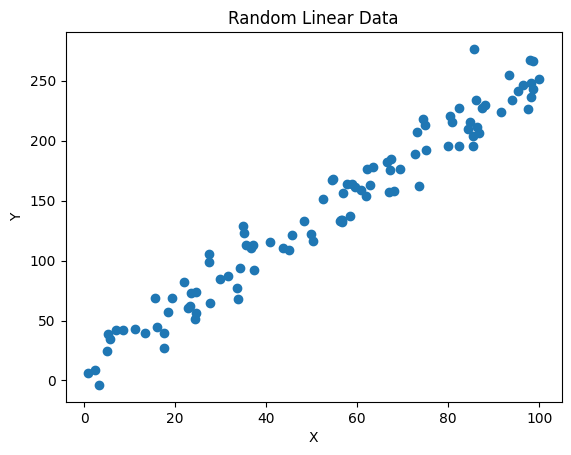

In [10]:
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Linear Data')

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow import keras

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

model=Sequential(
    layers.Dense(units=1,input_shape=(1,))
)

In [15]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='mean_squared_error')
model.fit(x,y,epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 22979.9551
Epoch 2/1000
4/4 [==============================] - 0s 0s/step - loss: 22262.5957
Epoch 3/1000
4/4 [==============================] - 0s 0s/step - loss: 21549.0469
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 20845.9785
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 20147.1367
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 19510.1055
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 18854.5645
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 18232.4355
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 17593.0156
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 17005.1191
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - loss: 16388.3105
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 15794.5186
Epo

4/4 [==============================] - 0s 384us/step - loss: 243.3749
Epoch 198/1000
4/4 [==============================] - 0s 3ms/step - loss: 243.4105
Epoch 199/1000
4/4 [==============================] - 0s 2ms/step - loss: 243.3651
Epoch 200/1000
4/4 [==============================] - 0s 3ms/step - loss: 243.3262
Epoch 201/1000
4/4 [==============================] - 0s 2ms/step - loss: 243.3679
Epoch 202/1000
4/4 [==============================] - 0s 2ms/step - loss: 243.3752
Epoch 203/1000
4/4 [==============================] - 0s 2ms/step - loss: 243.4055
Epoch 204/1000
4/4 [==============================] - 0s 2ms/step - loss: 243.4303
Epoch 205/1000
4/4 [==============================] - 0s 1ms/step - loss: 243.4272
Epoch 206/1000
4/4 [==============================] - 0s 2ms/step - loss: 243.3661
Epoch 207/1000
4/4 [==============================] - 0s 2ms/step - loss: 243.4111
Epoch 208/1000
4/4 [==============================] - 0s 2ms/step - loss: 243.3359
Epoch 209/1000
4/

4/4 [==============================] - 0s 3ms/step - loss: 241.4895
Epoch 394/1000
4/4 [==============================] - 0s 2ms/step - loss: 241.5110
Epoch 395/1000
4/4 [==============================] - 0s 3ms/step - loss: 241.3574
Epoch 396/1000
4/4 [==============================] - 0s 2ms/step - loss: 241.2692
Epoch 397/1000
4/4 [==============================] - 0s 793us/step - loss: 241.3481
Epoch 398/1000
4/4 [==============================] - 0s 2ms/step - loss: 241.1756
Epoch 399/1000
4/4 [==============================] - 0s 3ms/step - loss: 241.0994
Epoch 400/1000
4/4 [==============================] - 0s 2ms/step - loss: 241.3011
Epoch 401/1000
4/4 [==============================] - 0s 2ms/step - loss: 241.3099
Epoch 402/1000
4/4 [==============================] - 0s 2ms/step - loss: 241.3389
Epoch 403/1000
4/4 [==============================] - 0s 2ms/step - loss: 241.2083
Epoch 404/1000
4/4 [==============================] - 0s 2ms/step - loss: 241.2570
Epoch 405/1000
4/

4/4 [==============================] - 0s 2ms/step - loss: 238.1698
Epoch 590/1000
4/4 [==============================] - 0s 3ms/step - loss: 238.2294
Epoch 591/1000
4/4 [==============================] - 0s 1ms/step - loss: 238.1965
Epoch 592/1000
4/4 [==============================] - 0s 2ms/step - loss: 238.1637
Epoch 593/1000
4/4 [==============================] - 0s 2ms/step - loss: 238.3094
Epoch 594/1000
4/4 [==============================] - 0s 2ms/step - loss: 238.2326
Epoch 595/1000
4/4 [==============================] - 0s 2ms/step - loss: 238.1982
Epoch 596/1000
4/4 [==============================] - 0s 3ms/step - loss: 238.2473
Epoch 597/1000
4/4 [==============================] - 0s 2ms/step - loss: 238.2891
Epoch 598/1000
4/4 [==============================] - 0s 2ms/step - loss: 238.2999
Epoch 599/1000
4/4 [==============================] - 0s 2ms/step - loss: 238.3704
Epoch 600/1000
4/4 [==============================] - 0s 1ms/step - loss: 238.3500
Epoch 601/1000
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 236.6868
Epoch 786/1000
4/4 [==============================] - 0s 2ms/step - loss: 237.1886
Epoch 787/1000
4/4 [==============================] - 0s 1ms/step - loss: 236.8343
Epoch 788/1000
4/4 [==============================] - 0s 974us/step - loss: 236.1401
Epoch 789/1000
4/4 [==============================] - 0s 2ms/step - loss: 235.7535
Epoch 790/1000
4/4 [==============================] - 0s 2ms/step - loss: 235.3643
Epoch 791/1000
4/4 [==============================] - 0s 2ms/step - loss: 235.4061
Epoch 792/1000
4/4 [==============================] - 0s 1ms/step - loss: 235.0305
Epoch 793/1000
4/4 [==============================] - 0s 3ms/step - loss: 234.9019
Epoch 794/1000
4/4 [==============================] - 0s 1ms/step - loss: 235.2533
Epoch 795/1000
4/4 [==============================] - 0s 2ms/step - loss: 235.3052
Epoch 796/1000
4/4 [==============================] - 0s 2ms/step - loss: 234.7768
Epoch 797/1000
4/

4/4 [==============================] - 0s 1ms/step - loss: 231.2751
Epoch 982/1000
4/4 [==============================] - 0s 0s/step - loss: 231.5446
Epoch 983/1000
4/4 [==============================] - 0s 3ms/step - loss: 231.7026
Epoch 984/1000
4/4 [==============================] - 0s 2ms/step - loss: 231.2591
Epoch 985/1000
4/4 [==============================] - 0s 0s/step - loss: 231.1815
Epoch 986/1000
4/4 [==============================] - 0s 3ms/step - loss: 231.2596
Epoch 987/1000
4/4 [==============================] - 0s 2ms/step - loss: 230.9582
Epoch 988/1000
4/4 [==============================] - 0s 2ms/step - loss: 231.0139
Epoch 989/1000
4/4 [==============================] - 0s 2ms/step - loss: 231.1745
Epoch 990/1000
4/4 [==============================] - 0s 2ms/step - loss: 231.2419
Epoch 991/1000
4/4 [==============================] - 0s 3ms/step - loss: 231.0928
Epoch 992/1000
4/4 [==============================] - 0s 1ms/step - loss: 231.7916
Epoch 993/1000
4/4 [=

In [18]:
weights=model.get_weights()
weight,bias=weights[0],weights[1]
score=model.evaluate(x,y,verbose=0)

In [23]:
print("Weights: ",weight)
print("Bias: ",bias)
print('Loss: ',score)

Weights:  [[2.5215929]]
Bias:  [6.3643875]
Loss:  231.1757049560547
